Model definition

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input, regularizers

def conv_net(x):
    y = layers.Conv2D(16, (5, 5), activation='relu', padding='SAME')(x)
    y = layers.Dropout(0.5)(y)
    y = layers.MaxPooling2D((2, 2))(y)
    y = layers.Conv2D(32, (5, 5), activation='relu', padding='SAME')(y)
    y = layers.Dropout(0.5)(y)
    y = layers.MaxPooling2D((2, 2))(y)
    y = layers.Conv2D(64, (5, 5), activation='relu', padding='SAME')(y)
    y = layers.Dropout(0.5)(y)
    y = layers.MaxPooling2D((2, 2))(y)
    y = layers.Conv2D(128, (5, 5), activation='relu', padding='SAME')(y)
    y = layers.Dropout(0.5)(y)
    y = layers.MaxPooling2D((2, 2))(y)
    y = layers.Conv2D(256, (5, 5), activation='relu', padding='SAME')(y)
    y = layers.Dropout(0.5)(y)
    y = layers.MaxPooling2D((2, 2))(y)
    y = layers.Flatten()(y)
    return y

def classifier_net(x):
    y = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
    y = layers.Dropout(0.5)(y)
    y = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001))(y)
    y = layers.Dropout(0.5)(y)
    y = layers.Dense(10, activation='softmax')(y)
    return y

def model():
    inputs = Input(shape=(32,32,1))
    
    conv_output = conv_net(inputs)
    branches_output = [classifier_net(conv_output) for _ in range(2)] 
    merged_output = tf.stack(branches_output, axis=1)
    
    # 创建多输出模型
    model = models.Model(inputs=inputs, outputs=merged_output)
    
    return model


2024-08-11 20:24:22.869611: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-11 20:24:22.871009: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-11 20:24:22.900535: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-11 20:24:22.901056: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-11 20:24:23.440945: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Model layers

In [2]:
model = model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 32, 32, 16)           416       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 32, 32, 16)           0         ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 16, 16, 16)           0         ['dropout[0][0]']             
 D)                                                                                           

Model structure

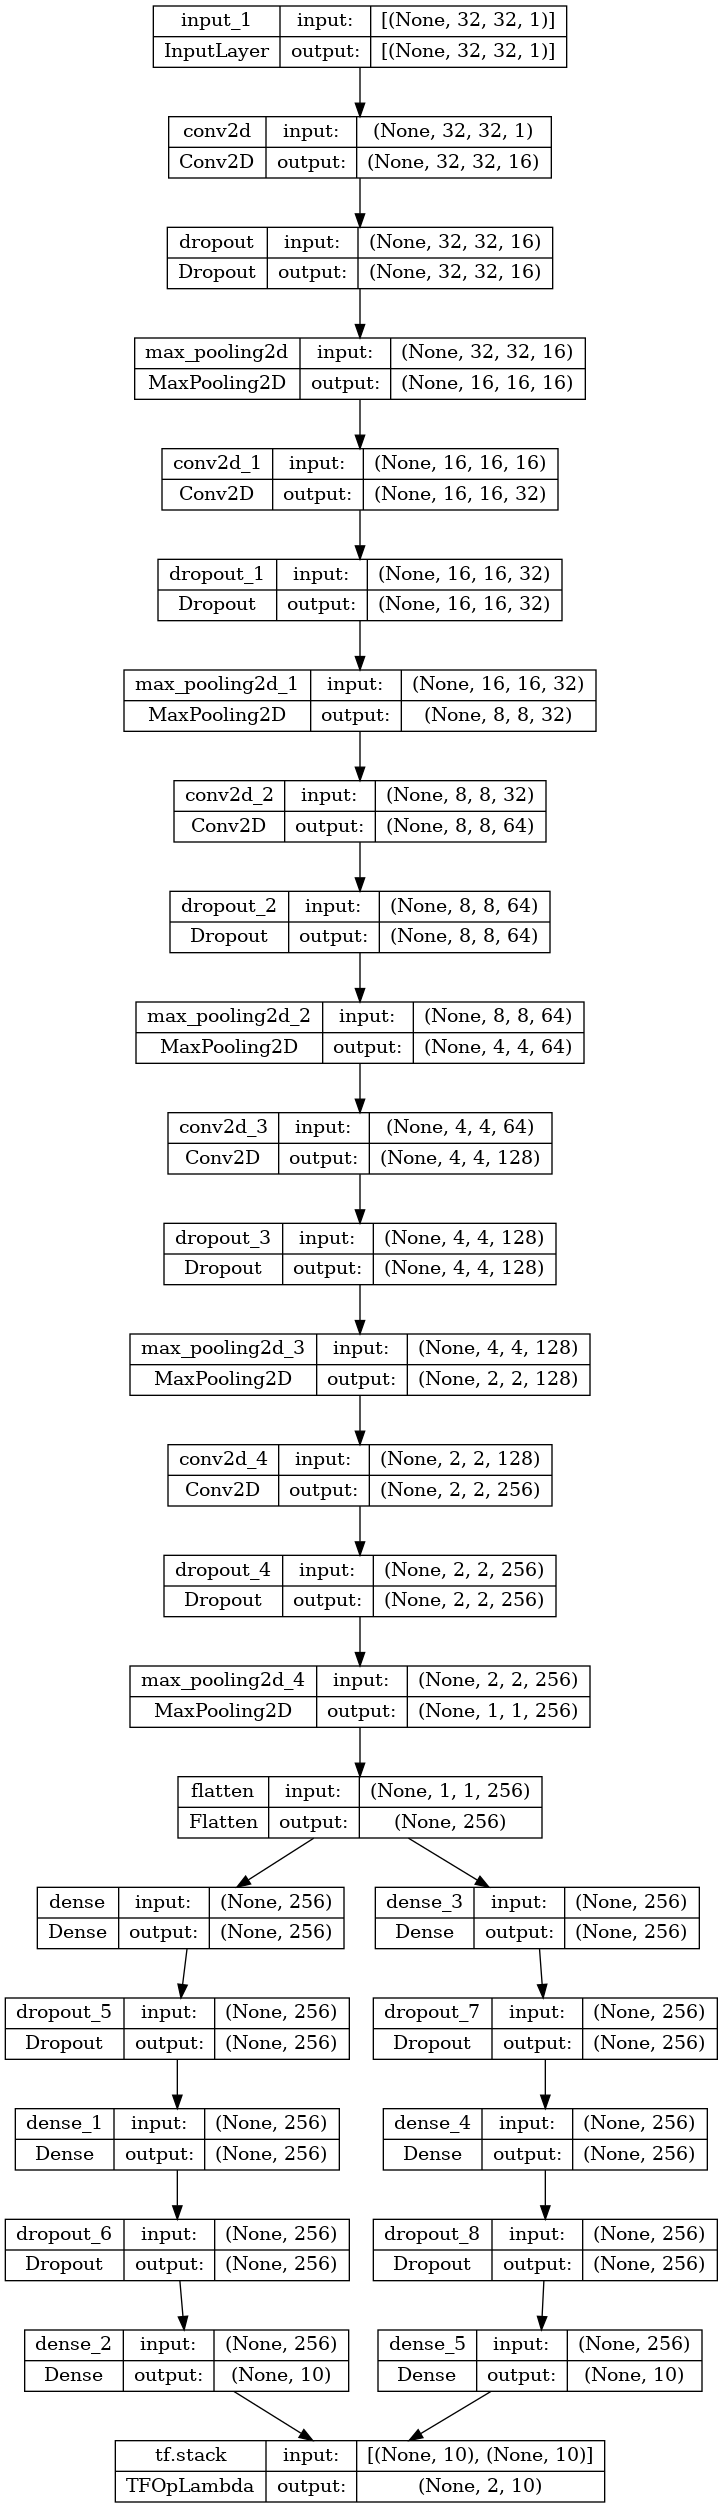

In [3]:
from tensorflow.keras.utils import plot_model

# 绘制模型结构并保存为PNG文件
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)
